# Approximation of Hodgkin-Huxley equations

In [41]:
%matplotlib inline
from sympy import Function, Derivative, symbols, tanh, cosh, Symbol, init_printing, Eq
import numpy as np


init_printing()

In [19]:
v1 = -1.2  # mV
v2 = 18  # mV
v3 = 8  # mV
v4 = 30  # mV

V_k = -84  # mV
V_na = 120  # mV
V_l = -60  # mV

g_k = 8  # mS/cm^2
g_na = 4.4  # ms/cm^2
g_l = 2  # mS/cm^2

C = 20  # uF/cm^2
phi_n = 25  # ms
h0 = 0.9


In [38]:
t = Symbol('t')
V = Function('V')(t)
n = Function('n')(t)

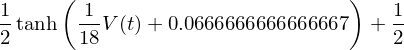

In [39]:
m_inf = (1 + tanh((V - v1)/v2))/2
m_inf

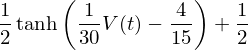

In [12]:
n_inf = (1 + tanh((V - v3)/v4))/2
n_inf


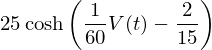

In [13]:
tau_n = phi_n*cosh((V - v3)/(2*v4))
tau_n


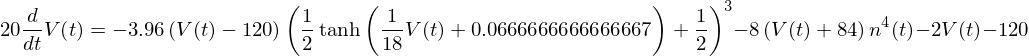

In [23]:
eq1 = Eq(C*V.diff(t), -g_na * (m_inf)**3 * h0 * (V - V_na) - g_k* n**4 * (V - V_k) - g_l*(V - V_l))
eq1

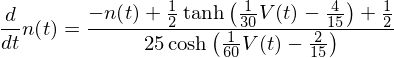

In [24]:
eq2 = Eq(n.diff(t), (n_inf - n)/tau_n)
eq2

In [25]:
f = (-g_na * (m_inf)**3 * h0 * (V - V_na) - g_k* n**4 * (V - V_k) - g_l*(V - V_l))/C
g = (n_inf - n)/tau_n

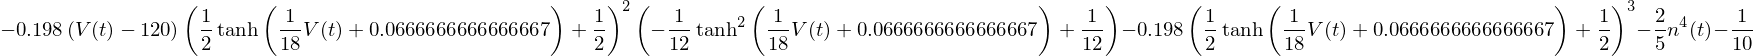

In [26]:
f.diff(V)

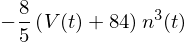

In [27]:
f.diff(n)

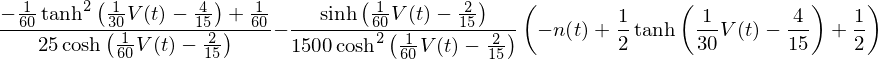

In [28]:
g.diff(V)

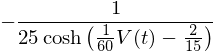

In [29]:
g.diff(n)

In [40]:
f.diff(V).evalf(subs={V: -60, n: 0})

In [48]:
steady_states = [
    (0, -60),
    (0.5, 10),
    (0.6, 14.5)
]

jacobians = []

for steady_state in steady_states:
    j11 = float(f.diff(V).evalf(subs={V: steady_state[1], n: steady_state[0]}))
    j12 = float(f.diff(n).evalf(subs={V: steady_state[1], n: steady_state[0]}))
    j21 = float(g.diff(V).evalf(subs={V: steady_state[1], n: steady_state[0]}))
    j22 = float(g.diff(n).evalf(subs={V: steady_state[1], n: steady_state[0]}))
    
    jacobian = np.array([
        [j11, j12],
        [j21, j22]
    ])
    
    print("Steady state at n={}, V={}".format(*steady_state))
    print("="*20)
    print("[-] Jacobian:")
    print(jacobian)
    
    print("[-] Eigenvalues")
    eigen_values = np.linalg.eig(jacobian)
    print(eigen_values[0])

Steady state at n=0, V=-60
[-] Jacobian:
[[ -9.99999643e-02   0.00000000e+00]
 [  1.97217797e-05  -2.33375575e-02]]
[-] Eigenvalues
[-0.02333756 -0.09999996]
Steady state at n=0.5, V=10
[-] Jacobian:
[[  5.42125615e-01  -1.88000000e+01]
 [  6.62604941e-04  -3.99777881e-02]]
[-] Eigenvalues
[ 0.51987518 -0.01772735]
Steady state at n=0.6, V=14.5
[-] Jacobian:
[[  3.64912260e-01  -3.40416000e+01]
 [  6.32131583e-04  -3.97664201e-02]]
[-] Eigenvalues
[ 0.30193733  0.02320851]
